<a href="https://colab.research.google.com/github/prakalya469/GLM1/blob/main/GLM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex1:**Topic modeling**

**Import Libraries and Download NLTK Resources**

In [ ]:
!pip install requests beautifulsoup4 nltk spacy gensim pyLDAvis matplotlib wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import numpy as np
import pandas as pd

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Initialize preprocessing tools**

In [ ]:
nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

**Load Data**

In [ ]:
text=pd.read_csv('/content/CRIME.ewAXrcNkYqL_HL5CU8Ujc-ubZJezzK8akywmwGeDx_w')

** Text Preprocessing**

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    words = [stemmer.stem(word) for word in words]  # Stemming
    return words

In [ ]:
preprocessed_texts = [preprocess_text(text) for text in text]
print("Preprocessed Texts:")
for text in preprocessed_texts:
        print(text)


Preprocessed Texts:
['field', 'id']
['label', 'act']
['type', 'string']
['id', 'b']
['label', 'major', 'head']
['type', 'string', '1']
['id', 'c']
['label', 'minor', 'head']
['type', 'string', '2']
['id']
['label', 'current', 'year', 'upto', 'end', 'month', 'review']
['type', 'string', '3']
['id', 'e']
['label', 'correspond', 'month', 'previou', 'year']
['type', 'string', '4']
['id', 'f']
['label', 'previou', 'month']
['type', 'string', '5']
['id', 'g']
['label', 'current', 'month']
['type', 'string']
['data', 'ipc', 'crime']
['murder', 'sec', '302', '303', 'ipc']
['gain']
['42']
['4']
['2']
['0']
['ipc', 'crime']
['murder', 'sec', '302', '303', 'ipc', '1']
['properti', 'disput']
['21']
['1']
['0']
['1']
['ipc', 'crime', '1']
['murder', 'sec', '302', '303', 'ipc', '2']
['due', 'person', 'vendetta', 'enem']
['30']
['3']
['3', '1']
['2']
['ipc', 'crime', '2']
['murder', 'sec', '302', '303', 'ipc', '3']
['due', 'sexual', 'jealousi']
['24']
['4', '1']
['1', '1']
['4']
['ipc', 'crime', '3']

** Create Document-Term Matrix**

In [ ]:
def create_document_term_matrix(texts):
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    return dictionary, corpus

In [ ]:
dictionary, bow_corpus = create_document_term_matrix(preprocessed_texts)
print("\nDocument-Term Matrix:")
print("Dictionary:", dictionary)
print("Bag of Words Corpus:", bow_corpus)


Document-Term Matrix:
Dictionary: Dictionary<1718 unique tokens: ['field', 'id', 'act', 'label', 'string']...>
Bag of Words Corpus: [[(0, 1), (1, 1)], [(2, 1), (3, 1)], [(4, 1), (5, 1)], [(1, 1), (6, 1)], [(3, 1), (7, 1), (8, 1)], [(4, 1), (5, 1), (9, 1)], [(1, 1), (10, 1)], [(3, 1), (7, 1), (11, 1)], [(4, 1), (5, 1), (12, 1)], [(1, 1)], [(3, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(4, 1), (5, 1), (19, 1)], [(1, 1), (20, 1)], [(3, 1), (15, 1), (18, 1), (21, 1), (22, 1)], [(4, 1), (5, 1), (23, 1)], [(1, 1), (24, 1)], [(3, 1), (15, 1), (22, 1)], [(4, 1), (5, 1), (25, 1)], [(1, 1), (26, 1)], [(3, 1), (13, 1), (15, 1)], [(4, 1), (5, 1)], [(27, 1), (28, 1), (29, 1)], [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1)], [(35, 1)], [(23, 1)], [(12, 1)], [(36, 1)], [(27, 1), (29, 1)], [(9, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(37, 1), (38, 1)], [(39, 1)], [(9, 1)], [(36, 1)], [(9, 1)], [(9, 1), (27, 1), (29, 1)], [(12, 1), (29, 1), (30, 1), (31, 1), (32,

**Create Document-Term Matrix**

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

In [ ]:
def plot_coherence_values(start, limit, step, coherence_values):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.title("Elbow Curve for Optimal Number of Topics")
    plt.show()


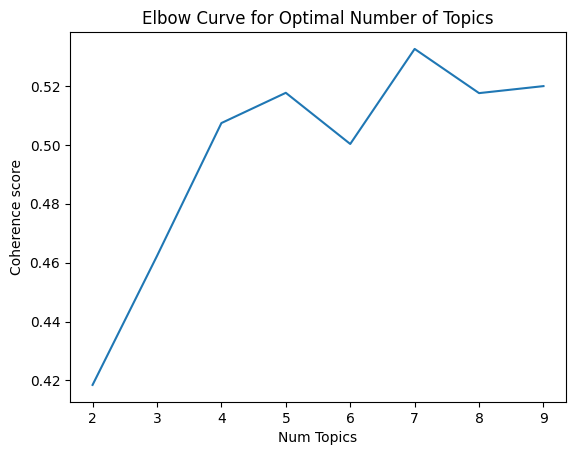

In [ ]:
start, limit, step = 2, 10, 1
coherence_values = compute_coherence_values(dictionary, bow_corpus, preprocessed_texts, limit, start, step)
plot_coherence_values(start, limit, step, coherence_values)

In [ ]:
def build_lda_model(corpus, dictionary, num_topics):
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
    return lda_model

In [ ]:
optimal_num_topics = coherence_values.index(max(coherence_values)) + start
print(f"\nOptimal number of topics: {optimal_num_topics}")


Optimal number of topics: 7


In [ ]:
 lda_model = build_lda_model(bow_corpus, dictionary, optimal_num_topics)

In [ ]:
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}')


Topics:
Topic: 0 
Words: 0.234*"2" + 0.033*"14" + 0.025*"20" + 0.024*"17" + 0.020*"girl" + 0.016*"minor" + 0.016*"31" + 0.015*"53" + 0.015*"48" + 0.013*"place"
Topic: 1 
Words: 0.117*"3" + 0.101*"na" + 0.061*"ipc" + 0.061*"sec" + 0.038*"murder" + 0.030*"attempt" + 0.016*"19" + 0.015*"kidnap" + 0.014*"homicid" + 0.014*"302"
Topic: 2 
Words: 0.039*"11" + 0.027*"due" + 0.023*"prohibit" + 0.019*"karnataka" + 0.014*"32" + 0.013*"26" + 0.013*"25" + 0.012*"47" + 0.011*"22" + 0.011*"49"
Topic: 3 
Words: 0.335*"1" + 0.022*"18" + 0.018*"6" + 0.014*"27" + 0.014*"30" + 0.013*"relat" + 0.012*"8" + 0.012*"403" + 0.011*"43" + 0.010*"44"
Topic: 4 
Words: 0.276*"ipc" + 0.222*"crime" + 0.053*"sec" + 0.043*"state" + 0.015*"public" + 0.015*"304" + 0.012*"death" + 0.012*"servant" + 0.010*"child" + 0.009*"dowri"
Topic: 5 
Words: 0.410*"0" + 0.005*"51" + 0.004*"36" + 0.004*"338" + 0.004*"218" + 0.004*"222" + 0.004*"292" + 0.003*"309" + 0.003*"mean" + 0.003*"burn"
Topic: 6 
Words: 0.134*"act" + 0.083*"karnat

In [ ]:
def generate_word_cloud(lda_model, num_topics):
    for i in range(num_topics):
        plt.figure()
        wordcloud = WordCloud()
        topics = lda_model.show_topic(i, 200)
        wordcloud.generate_from_frequencies(dict(topics))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for Topic #{i+1}")
        plt.show()

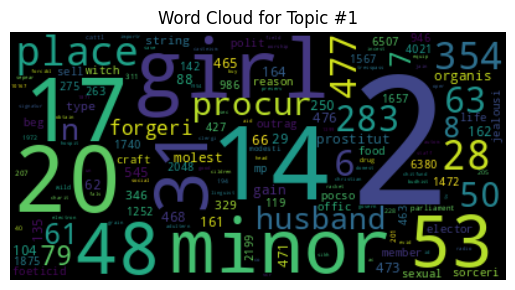

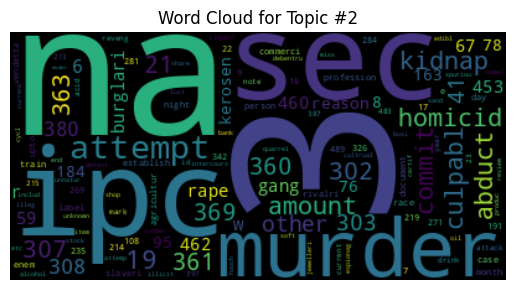

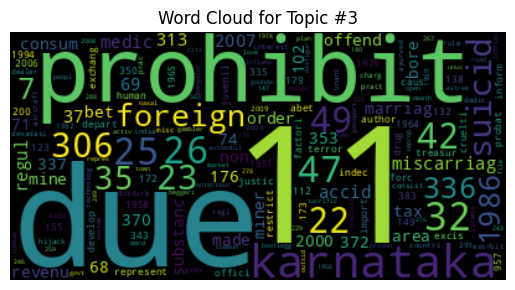

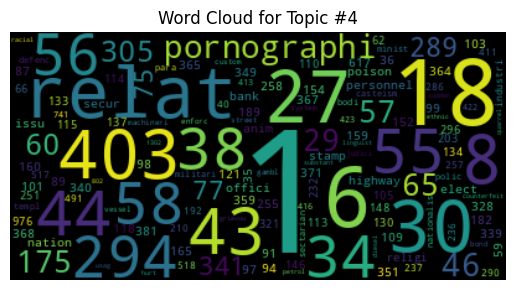

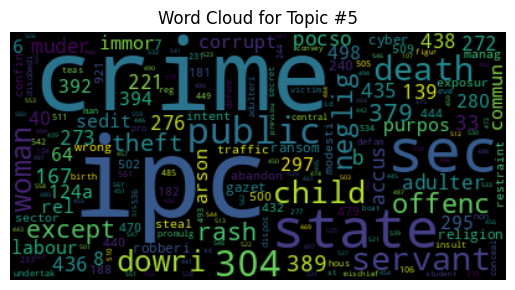

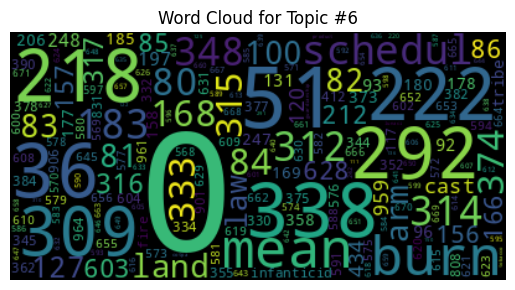

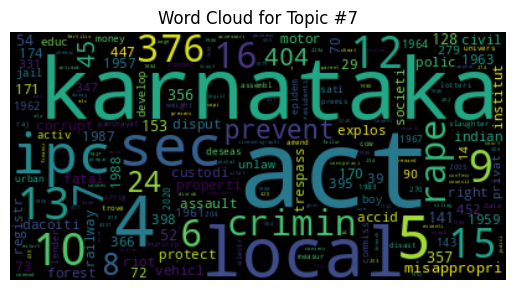

In [ ]:
generate_word_cloud(lda_model, optimal_num_topics)

In [ ]:
https://www.washingtonpost.com/news/true-crime/wp/2016/04/05/9-year-old-reporter-breaks-crime-news-posts-videos-fires-back-at-critics/"

ex:2
text summarization


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=dc6aab501296c580b75e68e0f4eff7fe3a7967f74eaff90b9e28ca47ab94a957
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install rouge  # Install the correct module

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from rouge import Rouge
import matplotlib.pyplot as plt

In [ ]:
url ='https://www.washingtonpost.com/news/true-crime/wp/2016/04/05/9-year-old-reporter-breaks-crime-news-posts-videos-fires-back-at-critics/'

In [ ]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [ ]:
# 1. Load URL content
def load_url_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.text for para in paragraphs])
    return text

In [ ]:

# 1. Load URL content
def load_url_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.text for para in paragraphs])
    return text

In [ ]:

# 2. Preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    words = [stemmer.stem(word) for word in words]  # Stemming
    return ' '.join(words)

In [ ]:
# 3. Vector Representation
def vector_representation(text, method='tfidf'):
    if method == 'bow':
        vectorizer = CountVectorizer()
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text])
    return vectors

In [ ]:
# 4. Sentence Scoring
def sentence_scoring(text, method='tfidf'):
    sentences = sent_tokenize(text)
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(sentences)
    scores = vectors.sum(axis=1).A1
    ranked_sentences = [sentences[i] for i in scores.argsort()[::-1]]
    return ranked_sentences

In [ ]:
# 5. ROUGE Score
def calculate_rouge(reference, summary):
    rouge = Rouge()
    scores = rouge.get_scores(summary, reference)
    return scores

In [ ]:
# 6. Cosine Similarity
def cosine_sim(text1, text2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(vectors[0:1], vectors[1:2])[0][0]

In [ ]:
# 7. Abstract Summarization
def abstract_summarization(text):
    sentences = sent_tokenize(text)
    abstract_summary = ' '.join(sentences[:3])  # Just taking the first 3 sentences as a dummy abstractive summary
    return abstract_summary

In [ ]:
# 8. Extractive Summarization
def extractive_summarization(text):
    ranked_sentences = sentence_scoring(text, method='tfidf')
    extractive_summary = ' '.join(ranked_sentences[:5])  # Taking top 5 ranked sentences
    return extractive_summary


In [ ]:
# 9. Validation Metrics
def validation_metrics(original, summary):
    original_words = set(original.split())
    summary_words = set(summary.split())
    precision = precision_score(list(original_words), list(summary_words), average='binary', zero_division=1)
    recall = recall_score(list(original_words), list(summary_words), average='binary', zero_division=1)
    f1 = f1_score(list(original_words), list(summary_words), average='binary', zero_division=1)
    return precision, recall, f1

In [ ]:
# Main execution
if __name__ == "__main__":
    text = load_url_content(url)
    print("Original Text:\n", text[:1000], "\n...")  # Display first 1000 characters of the original text

Original Text:
 clockThis article was published more than 8 years ago Reporter Hilde Kate Lysiak got the tip early Saturday afternoon that there was heavy police activity on Ninth Street. She hustled over with her pen and camera, as any good reporter would, and soon she posted something short online, beating all her competitors. Then, working the neighbors and the cops, she nailed down her scoop with a full-length story and this headline: “EXCLUSIVE: MURDER ON NINTH STREET!” The online story not only beat the local daily paper, but she also included a short video from the crime scene, assuring viewers that “I’m working hard on this investigation.” Then Monday came and Hilde had to go back to third grade. She is 9. As the editor and publisher of the Orange Street News, in her hometown of Selinsgrove, Pa., about 50 miles north of Harrisburg, Lysiak is a dedicated multi-media journalist who loves going after crime stories. Her father is an author and former New York Daily News reporter wh

In [ ]:
preprocessed_text = preprocess_text(text)
print("\nPreprocessed Text:\n", preprocessed_text[:1000], "\n...")


Preprocessed Text:
 clockthi articl publish 8 year ago report hild kate lysiak got tip earli saturday afternoon heavi polic activ ninth street hustl pen camera good report would soon post someth short onlin beat competitor work neighbor cop nail scoop full length stori headlin exclus murder ninth street onlin stori beat local daili paper also includ short video crime scene assur viewer work hard investig monday came hild go back third grade 9 editor publish orang street news hometown selinsgrov pa 50 mile north harrisburg lysiak dedic multi medium journalist love go crime stori father author former new york daili news report took hild newsroom stori cover around new york hook rush chase news like let peopl know inform hild said monday also see career matter stupid adult might say futur journal realli want crime definit favorit said learn murder stori got good tip sourc abl confirm well work report impress good peopl selinsgrov let hild facebook saturday night think appal u would stori

In [ ]:
 # Vector representation (TF-IDF)
vectors = vector_representation(preprocessed_text, method='tfidf')
print("\nTF-IDF Vectors Shape:", vectors.shape)


TF-IDF Vectors Shape: (1, 304)


In [ ]:
# Sentence scoring
ranked_sentences = sentence_scoring(text, method='tfidf')
print("\nRanked Sentences (Top 5):\n", ranked_sentences[:5])



Ranked Sentences (Top 5):
 ['Then, working the neighbors and the cops, she nailed down her scoop with a full-length story and this headline: “EXCLUSIVE: MURDER ON NINTH STREET!” The online story not only beat the local daily paper, but she also included a short video from the crime scene, assuring viewers that “I’m working hard on this investigation.” Then Monday came and Hilde had to go back to third grade.', 'In fact some of the adult-run newspapers were reporting the wrong news, or no news at all.” She does acknowledge that her 12-year-old sister, Isabel, edits and posts her videos, and also writes a kids’ column for the Item, identified as “the youngest paid advice columnist in America.” But that’s a whole separate publication.', '“People thought I should be like playing tea parties or doing something other than being at the crime scene,” and “I haven’t really checked” to see if she had received more after her Sunday video blast.', 'As the editor and publisher of the Orange Street

In [ ]:
 # Abstract summarization
abstract_summary = abstract_summarization(text)
print("\nAbstract Summary:\n", abstract_summary)


Abstract Summary:
 clockThis article was published more than 8 years ago Reporter Hilde Kate Lysiak got the tip early Saturday afternoon that there was heavy police activity on Ninth Street. She hustled over with her pen and camera, as any good reporter would, and soon she posted something short online, beating all her competitors. Then, working the neighbors and the cops, she nailed down her scoop with a full-length story and this headline: “EXCLUSIVE: MURDER ON NINTH STREET!” The online story not only beat the local daily paper, but she also included a short video from the crime scene, assuring viewers that “I’m working hard on this investigation.” Then Monday came and Hilde had to go back to third grade.


In [ ]:
# Extractive summarization
extractive_summary_text = extractive_summarization(text)
print("\nExtractive Summary:\n", extractive_summary_text)


Extractive Summary:
 Then, working the neighbors and the cops, she nailed down her scoop with a full-length story and this headline: “EXCLUSIVE: MURDER ON NINTH STREET!” The online story not only beat the local daily paper, but she also included a short video from the crime scene, assuring viewers that “I’m working hard on this investigation.” Then Monday came and Hilde had to go back to third grade. In fact some of the adult-run newspapers were reporting the wrong news, or no news at all.” She does acknowledge that her 12-year-old sister, Isabel, edits and posts her videos, and also writes a kids’ column for the Item, identified as “the youngest paid advice columnist in America.” But that’s a whole separate publication. “People thought I should be like playing tea parties or doing something other than being at the crime scene,” and “I haven’t really checked” to see if she had received more after her Sunday video blast. As the editor and publisher of the Orange Street News, in her hom

In [ ]:
 # ROUGE Score
rouge_scores_abstract = calculate_rouge(text, abstract_summary)
rouge_scores_extractive = calculate_rouge(text, extractive_summary_text)
print("\nROUGE Scores for Abstract Summary:\n", rouge_scores_abstract)
print("\nROUGE Scores for Extractive Summary:\n", rouge_scores_extractive)


ROUGE Scores for Abstract Summary:
 [{'rouge-1': {'r': 0.18972332015810275, 'p': 1.0, 'f': 0.3189368743956469}, 'rouge-2': {'r': 0.12102564102564102, 'p': 1.0, 'f': 0.21591948572258465}, 'rouge-l': {'r': 0.18972332015810275, 'p': 1.0, 'f': 0.3189368743956469}}]

ROUGE Scores for Extractive Summary:
 [{'rouge-1': {'r': 0.33201581027667987, 'p': 1.0, 'f': 0.4985163167322069}, 'rouge-2': {'r': 0.2276923076923077, 'p': 0.9823008849557522, 'f': 0.3696919203418467}, 'rouge-l': {'r': 0.33201581027667987, 'p': 1.0, 'f': 0.4985163167322069}}]


In [ ]:
# Cosine Similarity
cosine_sim_abstract = cosine_sim(preprocessed_text, abstract_summary)
cosine_sim_extractive = cosine_sim(preprocessed_text, extractive_summary_text)
print("\nCosine Similarity (Abstract):", cosine_sim_abstract)
print("\nCosine Similarity (Extractive):", cosine_sim_extractive)


Cosine Similarity (Abstract): 0.08337685453442593

Cosine Similarity (Extractive): 0.11098736541894029


In [ ]:
def validation_metrics(original, summary):
    original_words = word_tokenize(original)
    summary_words = word_tokenize(summary)

    # Handle potential length differences by padding with empty strings
    length_diff = abs(len(original_words) - len(summary_words))
    if len(original_words) < len(summary_words):
        original_words += [''] * length_diff  # Pad with empty strings instead of None
    elif len(summary_words) < len(original_words):
        summary_words += [''] * length_diff  # Pad with empty strings instead of None

    precision = precision_score(original_words, summary_words, average='weighted', zero_division=1)
    recall = recall_score(original_words, summary_words, average='weighted', zero_division=1)
    f1 = f1_score(original_words, summary_words, average='weighted', zero_division=1)

    return precision, recall, f1

In [ ]:
 # Validation metrics
metrics_abstract = validation_metrics(preprocessed_text, abstract_summary)
metrics_extractive = validation_metrics(preprocessed_text, extractive_summary_text)
print("\nAbstract Summarization Metrics (Precision, Recall, F1):", metrics_abstract)
print("\nExtractive Summarization Metrics (Precision, Recall, F1):", metrics_extractive)


Abstract Summarization Metrics (Precision, Recall, F1): (0.8857644991212654, 0.0, 0.11423550087873462)

Extractive Summarization Metrics (Precision, Recall, F1): (0.836555360281195, 0.0, 0.1634446397188049)


EX:3


In [ ]:
sentence1="Ships in harbour are safe"
sentence2="But thats not what ships are built for"

In [ ]:
set1=set(sentence1.lower().split())
set2=set(sentence2.lower().split())

In [ ]:
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_similarity = len(intersection) / len(union)

print(f"Jaccard Similarity: {jaccard_similarity}")

Jaccard Similarity: 0.18181818181818182


In [ ]:
#Euclidean distance

import math

# Tokenize sentences
tokens_1 = sentence1.lower().split()
tokens_2 = sentence2.lower().split()

# Create a combined vocabulary
vocabulary = list(set(tokens_1) | set(tokens_2))

# Create BoW vectors
bow_1 = [tokens_1.count(word) for word in vocabulary]
bow_2 = [tokens_2.count(word) for word in vocabulary]


euclidean_distance = math.sqrt(sum((bow_1[i] - bow_2[i]) ** 2 for i in range(len(vocabulary))))

print(f"Euclidean Distance: {euclidean_distance}")


Euclidean Distance: 3.0


In [ ]:
# BoW vectors for each sentence
print(f"BoW Vector for Sentence 1: {bow_1}")
print(f"BoW Vector for Sentence 2: {bow_2}")


BoW Vector for Sentence 1: [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
BoW Vector for Sentence 2: [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]


In [ ]:
# Calculate sentence vectors as the average of word vectors (BoW vectors in this case)
cbow_vector_1 = [sum(bow_1) / len(bow_1)] * len(vocabulary)
cbow_vector_2 = [sum(bow_2) / len(bow_2)] * len(vocabulary)

print(f"CBOW Vector for Sentence 1: {cbow_vector_1}")
print(f"CBOW Vector for Sentence 2: {cbow_vector_2}")


CBOW Vector for Sentence 1: [0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453]
CBOW Vector for Sentence 2: [0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273]


In [ ]:
# Calculate dot product
dot_product = sum(bow_1[i] * bow_2[i] for i in range(len(vocabulary)))

# Calculate magnitudes
magnitude_1 = math.sqrt(sum(bow_1[i] ** 2 for i in range(len(vocabulary))))
magnitude_2 = math.sqrt(sum(bow_2[i] ** 2 for i in range(len(vocabulary))))

# Calculate Cosine similarity
cosine_similarity = dot_product / (magnitude_1 * magnitude_2)

print(f"Cosine Similarity: {cosine_similarity}")


Cosine Similarity: 0.31622776601683794


In [ ]:
#Clustering

from sklearn.cluster import KMeans

# Sample data (replace with your actual data)
data = [bow_1, bow_2]

# Number of clusters
num_clusters = 2

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

print(f"Cluster Labels: {labels}")


Cluster Labels: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
def one_hot_encode(text):
  words=text.split()#tokenization
  voc=set(words)
  word_to_index={word:index for index,word in enumerate(voc)}#is created to map each word to a unique index.
  one_hot_encode=[]
  for word in words:
    one_hot_vector=[0]*len(voc)
    one_hot_vector[word_to_index[word]]=1
    one_hot_encode.append(one_hot_vector)
    return one_hot_encode, word_to_index,voc



In [ ]:
text="ships in harbour are safe but thats not what ships are built for"


In [ ]:
one_hot_encode,word_to_index,voc=one_hot_encode(text)

In [ ]:
print("Vocabulary:", voc)
print("Word to Index Mapping:", word_to_index)
print("One-Hot Encoded Matrix:")
for word, encoding in zip(text.split(), one_hot_encode):
    print(f"{word}: {encoding}")

Vocabulary: {'what', 'ships', 'are', 'but', 'harbour', 'safe', 'thats', 'built', 'for', 'not', 'in'}
Word to Index Mapping: {'what': 0, 'ships': 1, 'are': 2, 'but': 3, 'harbour': 4, 'safe': 5, 'thats': 6, 'built': 7, 'for': 8, 'not': 9, 'in': 10}
One-Hot Encoded Matrix:
ships: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
doc=["ships in harbour are safe.", "but thats not what ships are built for"]

In [ ]:
vect=CountVectorizer() #X
X=vect.fit_transform(doc)
feature_names=vect.get_feature_names_out()

In [ ]:
print("bow matrix:")
print(X.toarray())
print("voc(feature_names):",feature_names)

bow matrix:
[[1 0 0 0 1 1 0 1 1 0 0]
 [1 1 1 1 0 0 1 0 1 1 1]]
voc(feature_names): ['are' 'built' 'but' 'for' 'harbour' 'in' 'not' 'safe' 'ships' 'thats'
 'what']


In [ ]:
from sklearn .feature_extraction.text import TfidfVectorizer

In [ ]:
doc=["ships in harbour are safe.",
     "but thats not what ships are built for"]

In [ ]:
vect=TfidfVectorizer()
X=vect.fit_transform(doc)
feature_names=vect.get_feature_names_out()
tfidf_values={}


In [ ]:
for doc_index, doc in enumerate(doc):
    feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
    tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
    tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}

In [ ]:
for doc_index,values in tfidf_values.items():
  print(f"Doc{doc_index+1}:")
  for word,tfidf in values.items():
    print(f"word:{word}:{tfidf_values}")

Doc1:
word:safe:{0: {'safe': 0.4992213265230509, 'are': 0.35520008546852583, 'harbour': 0.4992213265230509, 'in': 0.4992213265230509, 'ships': 0.35520008546852583}, 1: {'for': 0.3776277807406418, 'built': 0.3776277807406418, 'what': 0.3776277807406418, 'not': 0.3776277807406418, 'thats': 0.3776277807406418, 'but': 0.3776277807406418, 'are': 0.26868527618515564, 'ships': 0.26868527618515564}}
word:are:{0: {'safe': 0.4992213265230509, 'are': 0.35520008546852583, 'harbour': 0.4992213265230509, 'in': 0.4992213265230509, 'ships': 0.35520008546852583}, 1: {'for': 0.3776277807406418, 'built': 0.3776277807406418, 'what': 0.3776277807406418, 'not': 0.3776277807406418, 'thats': 0.3776277807406418, 'but': 0.3776277807406418, 'are': 0.26868527618515564, 'ships': 0.26868527618515564}}
word:harbour:{0: {'safe': 0.4992213265230509, 'are': 0.35520008546852583, 'harbour': 0.4992213265230509, 'in': 0.4992213265230509, 'ships': 0.35520008546852583}, 1: {'for': 0.3776277807406418, 'built': 0.3776277807406

In [ ]:
cbow_vectors=np.mean(tfidf_matrix.toarray(),axis=1)

In [ ]:
for doc_index,cbow_vector in enumerate(cbow_vectors):
  print(f"cbow vector doc{doc_index+1}:{cbow_vector}")

cbow vector doc1:0.20073310459147312
cbow vector doc2:0.25483065789219655


In [ ]:
set1=set(doc.lower().split())
set2=set(doc.lower().split())

In [ ]:
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_similarity = len(intersection) / len(union)

print(f"Jaccard Similarity: {jaccard_similarity}")


Jaccard Similarity: 1.0


In [ ]:
import math

def euclidean_distance(vector1, vector2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vector1, vector2)))  # Iterate over elements directly

# Ensure you are passing the entire vectors, not just single elements
distance = euclidean_distance(cbow_vectors[0], cbow_vectors[1])
print(distance)

TypeError: 'numpy.float64' object is not iterable